# Introduction to Solving ODEs

In this example we're going to solve the linear ODE:

$$ y' = \alpha y $$

First, we need to import the package DifferentialEquations.jl

In [ ]:
using DifferentialEquations

We write the ODE as

$$ y' = f(y,t) $$

Here, we will let $\alpha = 0.5$. Let the initial condition be $u_0 = 1.5$ and the timespan be $[0,1]$. Thus we define the ODEProblem with the following code:

In [ ]:
f(t,y) = 0.5*y
y₀ = 1.5
prob = ODEProblem(f,y₀)
tspan = [0,1]

`ODEProblem(f,u₀)` returns an `ODEProblem` type which contains all of the information necessary for solving the ODE. To solve the problem, we use the following command: 

In [ ]:
sol = solve(prob,tspan)

`sol` is an `ODESolution` type which contains all of the information about the numerical solution. There are some convience functions written for it to make things easier. For example, we can print the solution to understand more about it: 

In [ ]:
print(sol)

Plot recipes are provided via Plots.jl. To plot the solution, we simply use the command `plot`.


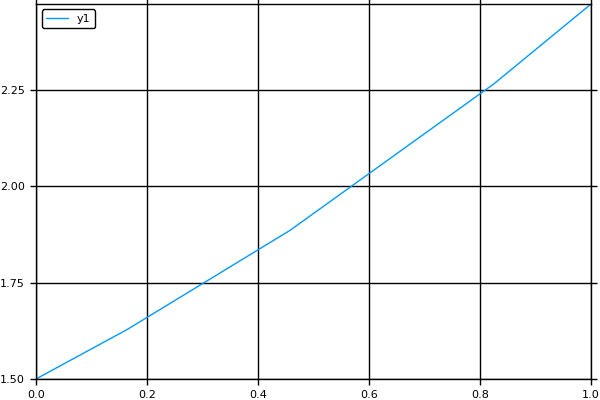

In [ ]:
plot(sol)

Note: all of the options available in Plots.jl can be used to modify the plot. For more information, see [the Plots.jl documentation](https://juliaplots.github.io/) or take a look at the Formatting the Plots notebook].

sys:1: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.



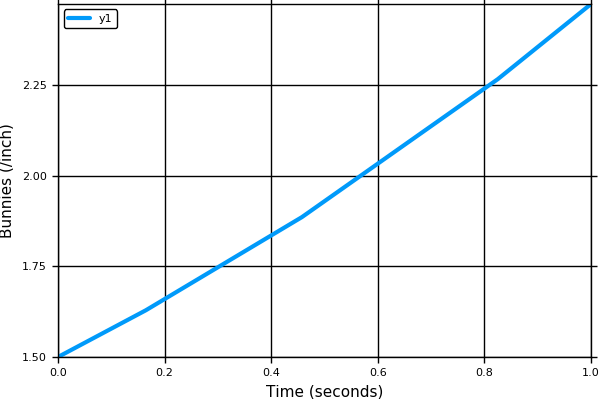

In [ ]:
plot(sol,lw=3,yguide="Bunnies (/inch)",xguide="Time (seconds)")

That's all it takes to solve ODEs in DifferentialEquations.jl!

## Solver Options

The solver is controlled via keyword arguments. For example, we can set the initial timestep with the flag `Δt`, and we can set change the algorithm with the keyword `alg`. Let's change the algorithm to Euler's method with $\Delta t = \frac{1}{2^4}$. To do this, we use the command:


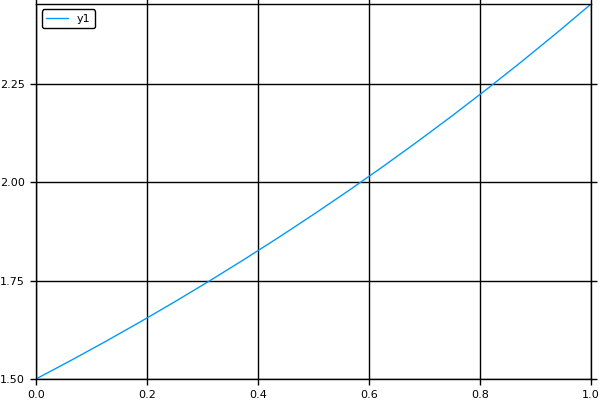

In [ ]:
sol = solve(prob,tspan,Δt=1/2^4,alg=:Euler)
plot(sol)

Notice that this time the solver took much smaller steps, making a smoother output in the graph. Other notebooks go into more detail on how to control the solver, and the options are all described in the documentation.

## The Solution Object

Let's take a more detailed look at the solution object. We can get the information by looking at the documentation, or by calling for the docstring:

In [ ]:
?ODESolution

search: ODESolution



ODESolution

Holds the data for the solution to an ODE problem.

### Fields

  * `u::Array{Float64}`: The solution (at the final timepoint)
  * `trueknown::Bool`: Boolean flag for if the true solution is given.
  * `u_analytic::AbstractArrayOrVoid`: The true solution at the final timepoint.
  * `errors`: A dictionary of the error calculations.
  * `timeseries`::AbstractArrayOrVoid`: u over time. Only saved if`save_timeseries=true`

is specified in the solver. * `t::AbstractArrayOrVoid`: All the t's in the solution. Only saved if `save_timeseries=true` is specified in the solver. * `timeseries_analytic`: If `save_timeseries=true`, saves the solution at each timestep. * `prob::DEProblem`: Holds the problem object used to define the problem. * `save_timeseries::Bool`: True if solver saved the extra timepoints. * `appxTrue::Bool`: Boolean flag for if u_analytic was an approximation.


This shows us all of the values that are contained in the solution object. For example, the field `timeseries` holds the time-series of the solution, and `ts` are the values of `t` for which the solution was calculated. We can print these out to look at the numerical solution:

In [ ]:
sol.timeseries

17-element Array{Float64,1}:
 1.5    
 1.54688
 1.59521
 1.64507
 1.69647
 1.74949
 1.80416
 1.86054
 1.91868
 1.97864
 2.04047
 2.10424
 2.17   
 2.23781
 2.30774
 2.37986
 2.45423

In [ ]:
sol.t

17-element Array{Float64,1}:
 0.0   
 0.0625
 0.125 
 0.1875
 0.25  
 0.3125
 0.375 
 0.4375
 0.5   
 0.5625
 0.625 
 0.6875
 0.75  
 0.8125
 0.875 
 0.9375
 1.0   

The solution object contains some extra goodies to make the analysis easier. For example, we can access the 3rd value of the solution via:

In [ ]:
sol[3]

1.59521484375

## Systems of ODEs

DifferentialEquations.jl can solve very general systems of ODEs. For example, let's solve the ODE:

$$  \left[\begin{array}{cc}
y_{11}^{\prime} & y_{12}^{\prime}\\
y_{21}^{\prime} & y_{22}^{\prime}\\
y_{31}^{\prime} & y_{32}^{\prime}\\
y_{41}^{\prime} & y_{42}^{\prime}
\end{array}\right]=\left[\begin{array}{cccc}
1 & 0 & 0 & -5\\
4 & 2 & 4 & -3\\
-4 & 0 & 0 & 1\\
5 & -2 & 2 & 3
\end{array}\right]\left[\begin{array}{cc}
y_{11} & y_{12}\\
y_{21} & y_{22}\\
y_{31} & y_{32}\\
y_{41} & y_{42}
\end{array}\right] $$

with random initial conditions. To do this, we can write the equation form

$$ y^\prime = f(y) $$

where $y$ is a matrix. In Julia, we do this by:

In [ ]:
A = [1. 0 0 -5
     4 -2 4 -3
     -4 0 0 1
     5 -2 2 3]
y₀ = rand(4,2)
f(t,y) = A*y
prob = ODEProblem(f,y₀)

DifferentialEquations.ODEProblem{Array{Float64,2},Float64}(f,[0.455313 0.823021; 0.979576 0.830985; 0.749235 0.623976; 0.856193 0.880483],DifferentialEquations.#232,false,2,false)

Now we just call the solver:


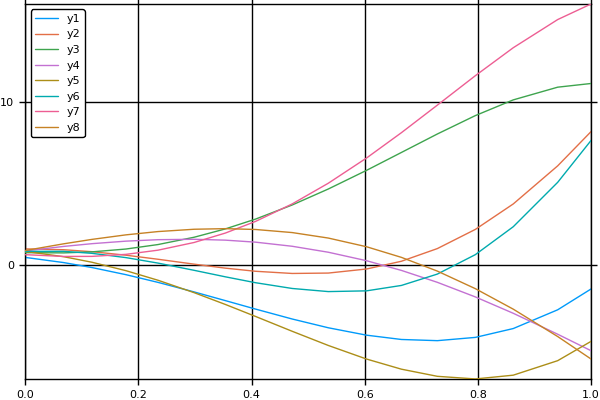

In [ ]:
sol = solve(prob)
plot(sol)

 ## More Information
 
That concludes this first introduction to DifferentialEquations.jl. For more examples, please check out the other IJulia notebooks contained in the /examples folder. If you have IJulia installed, these can be accessed via:

In [ ]:
using IJulia
cd(Pkg.dir("DifferentialEquations")*"/examples")
notebook()

Check out the documentation for some tutorials and in-depth information about the solvers.